In [9]:
import random
def majority_vote(votes):
    """Return the most common element in votes"""
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    
    return random.choice(winners)

import numpy as np
def distance(p1, p2):
    """Finds the distance between points p1 and p2."""
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

def find_nearest_neighbors(p, points, k):
    """Find the k nearest neighbors of point p and return their indices."""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid."""
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    
    return (xx, yy, prediction_grid)

import scipy.stats as ss
def generate_synth_data(n=50):
    """Create two sets of points from bivariate normal distribution"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points, outcomes)

import matplotlib.pyplot as plt
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [10]:
from sklearn import datasets
iris = datasets.load_iris()

In [11]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
predictors = iris.data[:, 0:2]
outcomes = iris.target

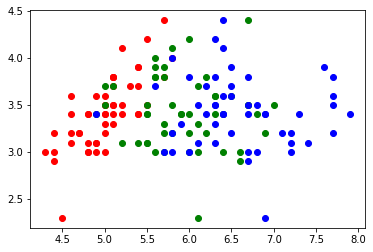

In [13]:
import matplotlib.pyplot as plt
plt.plot(predictors[outcomes == 0][:,0],predictors[outcomes == 0][:,1], "ro")
plt.plot(predictors[outcomes == 1][:,0],predictors[outcomes == 0][:,1], "go")
plt.plot(predictors[outcomes == 2][:,0],predictors[outcomes == 0][:,1], "bo")
plt.savefig("iris.pdf")

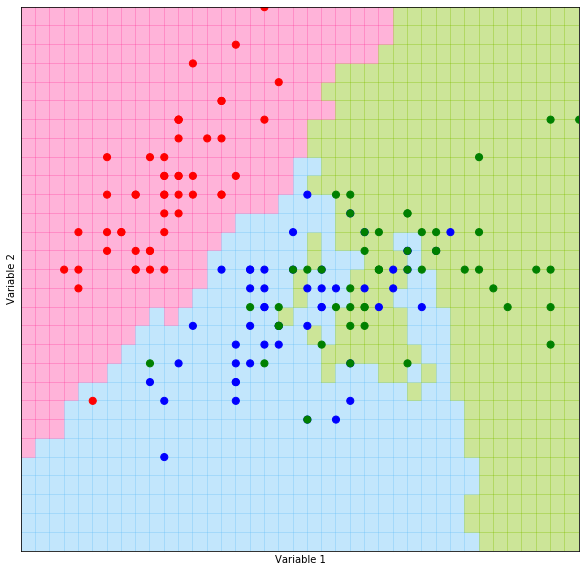

In [14]:
k=5; filename = "iris_grid.pdf"; limits = (4,8,1.5,4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [16]:
knn.fit(predictors, outcomes)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
sk_predictions = knn.predict(predictors)

In [19]:
sk_predictions.shape

(150,)

In [20]:
sk_predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [22]:
my_predictions.shape

(150,)

In [23]:
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [24]:
np.mean(sk_predictions == my_predictions)

0.96

In [25]:
np.mean(sk_predictions == my_predictions)*100

96.0

In [26]:
np.mean(sk_predictions == outcomes)*100

83.33333333333334

In [27]:
np.mean(outcomes == my_predictions)*100

84.66666666666667

In [28]:
# What are the four variables in the iris dataset described in Video 3.3.8?
# Sepal length, sepal width, petal length, petal width

In [29]:
# How many different species are contained in the iris dataset described in Video 3.3.8?
# 3

In [30]:
# How often do the predictions from the homemade and scikit-learn kNN classifiers accurately predict the class of the data in the iris dataset described in Video 3.3.8?
# Approximately 85% of the time